✅ Dados carregados com sucesso!
  desc_status_credito  status_credito  valor_credito  idade faixa_etaria  \
0                 Bom               1           1049     21   18-24 anos   
1                 Bom               1           2799     36   25-40 anos   
2                 Bom               1            841     23   18-24 anos   
3                 Bom               1           2122     39   25-40 anos   
4                 Bom               1           2171     38   25-40 anos   

  tipo_moradia categoria_finalidade  
0      Alugada  Móveis/Equipamentos  
1      Alugada           Carro Novo  
2      Alugada             Negócios  
3      Alugada           Carro Novo  
4      Própria           Carro Novo  


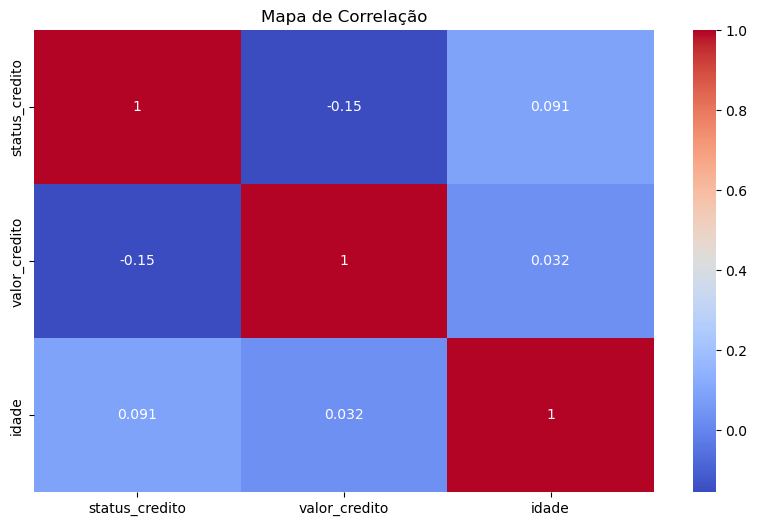

In [3]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

db_path = db_path = r'C:\Users\camil\Desktop\PROJETO-SQL\database\credit_analysis.db'

if os.path.exists(db_path):
    conn = sqlite3.connect(db_path)
    df = pd.read_sql("SELECT * FROM tb_analise_final_credito", conn)
    conn.close()
    
    print("✅ Dados carregados com sucesso!")
    print(df.head())
    
    # Gráfico de Correlação
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
    plt.title('Mapa de Correlação')
    plt.show()
else:
    print(f"❌ Erro: O arquivo {db_path} não foi encontrado. Verifique se ele está na pasta correta!")

In [5]:
print(df.columns)

Index(['desc_status_credito', 'status_credito', 'valor_credito', 'idade',
       'faixa_etaria', 'tipo_moradia', 'categoria_finalidade'],
      dtype='object')


In [6]:
from sklearn.model_selection import train_test_split


colunas_para_transformar = ['tipo_moradia', 'categoria_finalidade', 'faixa_etaria']


df_limpo = df.drop(columns=['desc_status_credito'])

df_preparado = pd.get_dummies(df_limpo, columns=colunas_para_transformar, drop_first=True)

X = df_preparado.drop('status_credito', axis=1) 
y = df_preparado['status_credito']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Dados preparados com sucesso!")
print(f"Colunas criadas após o Encoding: {list(df_preparado.columns)}")

✅ Dados preparados com sucesso!
Colunas criadas após o Encoding: ['status_credito', 'valor_credito', 'idade', 'tipo_moradia_Gratuita', 'tipo_moradia_Própria', 'categoria_finalidade_Carro Usado', 'categoria_finalidade_Educação', 'categoria_finalidade_Eletrodomésticos', 'categoria_finalidade_Móveis/Equipamentos', 'categoria_finalidade_Negócios', 'categoria_finalidade_Outros', 'categoria_finalidade_Reparos', 'categoria_finalidade_Rádio/Televisão', 'faixa_etaria_25-40 anos', 'faixa_etaria_41-60 anos', 'faixa_etaria_60+ anos']


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

modelo = RandomForestClassifier(n_estimators=100, random_state=42)

modelo.fit(X_train, y_train)

previsoes = modelo.predict(X_test)

print(f"📊 Precisão Geral (Acurácia): {accuracy_score(y_test, previsoes):.2%}")
print("\n📋 Relatório Detalhado:")
print(classification_report(y_test, previsoes))

📊 Precisão Geral (Acurácia): 69.00%

📋 Relatório Detalhado:
              precision    recall  f1-score   support

           0       0.49      0.34      0.40        92
           1       0.74      0.85      0.79       208

    accuracy                           0.69       300
   macro avg       0.62      0.59      0.60       300
weighted avg       0.67      0.69      0.67       300



In [8]:
modelo_turbinado = RandomForestClassifier(
    n_estimators=200,          
    max_depth=10,              
    class_weight='balanced',   
    random_state=42
)

modelo_turbinado.fit(X_train, y_train)

previsoes_novas = modelo_turbinado.predict(X_test)

print(f"📊 Nova Acurácia: {accuracy_score(y_test, previsoes_novas):.2%}")
print(classification_report(y_test, previsoes_novas))

📊 Nova Acurácia: 69.00%
              precision    recall  f1-score   support

           0       0.49      0.38      0.43        92
           1       0.75      0.83      0.79       208

    accuracy                           0.69       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.67      0.69      0.68       300



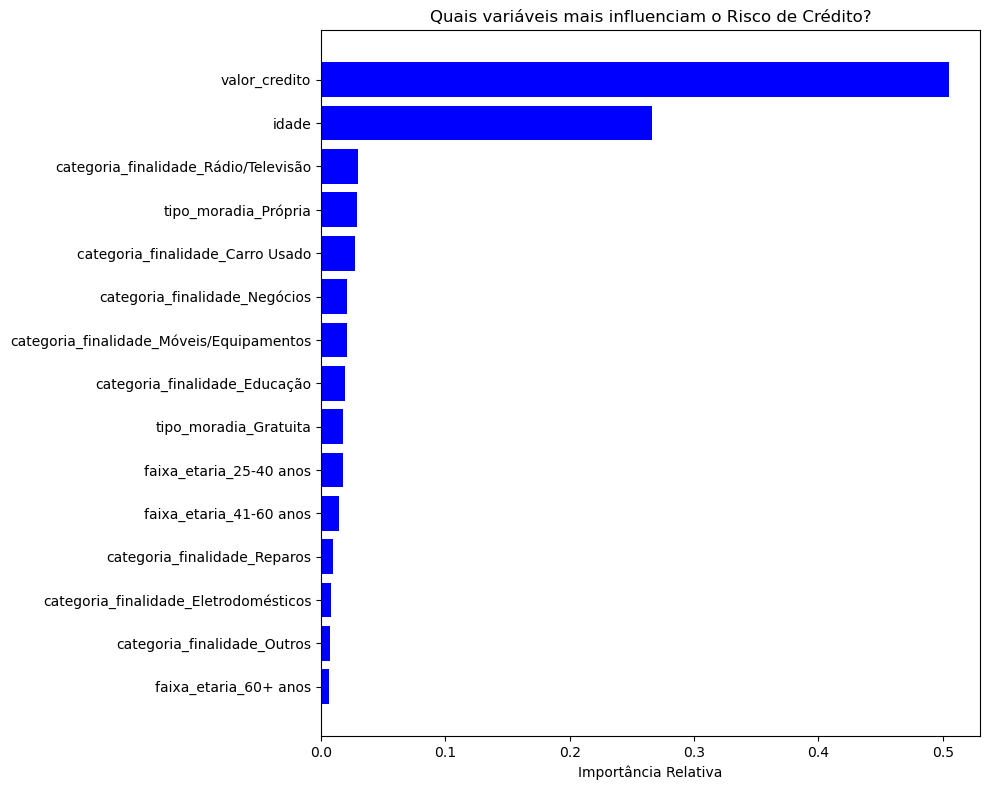

In [9]:
import numpy as np

importancias = modelo.feature_importances_
features = X.columns


indices = np.argsort(importancias)

plt.figure(figsize=(10, 8))
plt.title('Quais variáveis mais influenciam o Risco de Crédito?')
plt.barh(range(len(indices)), importancias[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importância Relativa')
plt.tight_layout()
plt.show()